# Diamond Price Prediction - Improved Model

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import statsmodels.api as sm
import statsmodels.formula.api as smf
import  scipy.stats as stats

In [3]:
df = pd.read_csv('Diamonds.csv')
df

,carat,cut,color,clarity,price,x,y,z
0,0.23,Ideal,E,SI2,326,3.95,3.98,2.43
1,0.21,Premium,E,SI1,326,3.89,3.84,2.31
2,0.23,Good,E,VS1,327,4.05,4.07,2.31
3,0.29,Premium,I,VS2,334,4.20,4.23,2.63
4,0.31,Good,J,SI2,335,4.34,4.35,2.75
...,...,...,...,...,...,...,...,...
53935,0.72,Ideal,D,SI1,2757,5.75,5.76,3.50
53936,0.72,Good,D,SI1,2757,5.69,5.75,3.61
53937,0.70,Very Good,D,SI1,2757,5.66,5.68,3.56
53938,0.86,Premium,H,SI2,2757,6.15,6.12,3.74


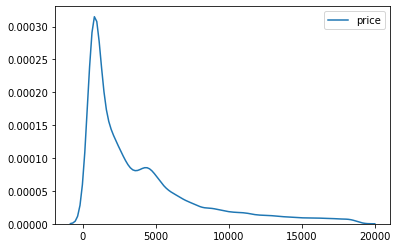

In [4]:
sns.kdeplot(df.price)

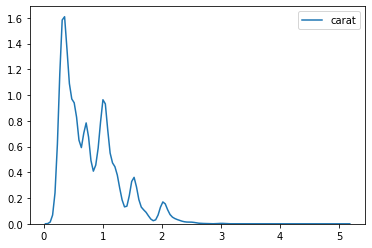

In [5]:
sns.kdeplot(df.carat)

In [6]:
df['logprice'] = np.log(df.price)
df.carat = np.log(df.carat)

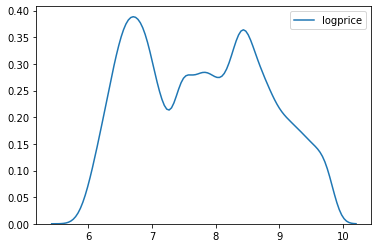

In [8]:
sns.kdeplot(df.logprice)

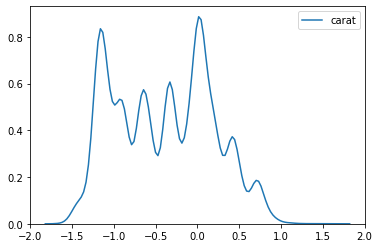

In [9]:
sns.kdeplot(df.carat)

In [10]:
df.corr()

,carat,price,x,y,z,logprice
carat,1.000000,0.855526,0.990166,0.966495,0.969060,0.965914
price,0.855526,1.000000,0.884435,0.865421,0.861249,0.895771
x,0.990166,0.884435,1.000000,0.974701,0.970772,0.958010
y,0.966495,0.865421,0.974701,1.000000,0.952006,0.936173
z,0.969060,0.861249,0.970772,0.952006,1.000000,0.935218
logprice,0.965914,0.895771,0.958010,0.936173,0.935218,1.000000


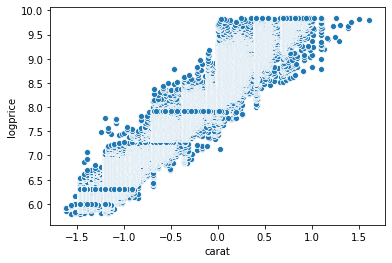

In [11]:
sns.scatterplot(df.carat, df.logprice)

In [12]:
formula = 'logprice ~ carat + cut + color + clarity + x + y + z'

In [13]:
lm = smf.ols(formula = formula, data = df).fit()

In [14]:
print(lm.summary())

                            OLS Regression Results                            
Dep. Variable:               logprice   R-squared:                       0.983
Model:                            OLS   Adj. R-squared:                  0.983
Method:                 Least Squares   F-statistic:                 1.457e+05
Date:                Sun, 30 May 2021   Prob (F-statistic):               0.00
Time:                        22:11:55   Log-Likelihood:                 32072.
No. Observations:               53940   AIC:                        -6.410e+04
Df Residuals:                   53918   BIC:                        -6.390e+04
Df Model:                          21                                         
Covariance Type:            nonrobust                                         
                       coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------
Intercept            7.4967      0.026  

In [15]:
pred = lm.predict(df)

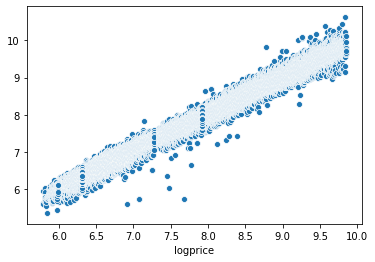

In [16]:
sns.scatterplot(df.logprice, pred)

In [17]:
resid = pred - df.logprice

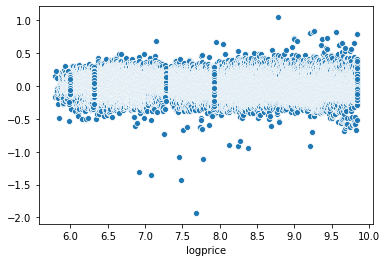

In [18]:
sns.scatterplot(df.logprice, resid)

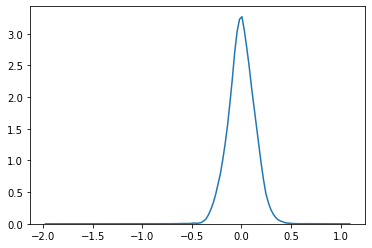

In [19]:
sns.kdeplot(resid)

In [20]:
np.exp(pred)

0         280.647327
1         274.385712
2         382.933084
3         417.744262
4         285.099003
            ...     
53935    2942.134316
53936    2716.710405
53937    2671.815551
53938    2651.669895
53939    2692.910409
Length: 53940, dtype: float64

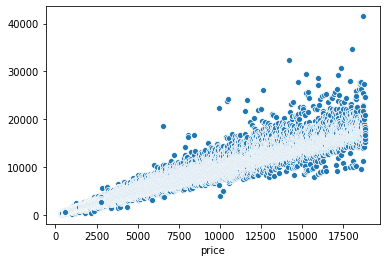

In [21]:
sns.scatterplot(df.price, np.exp(pred))

### Method 2

In [22]:
df

,carat,cut,color,clarity,price,x,y,z,logprice
0,-1.469676,Ideal,E,SI2,326,3.95,3.98,2.43,5.786897
1,-1.560648,Premium,E,SI1,326,3.89,3.84,2.31,5.786897
2,-1.469676,Good,E,VS1,327,4.05,4.07,2.31,5.789960
3,-1.237874,Premium,I,VS2,334,4.20,4.23,2.63,5.811141
4,-1.171183,Good,J,SI2,335,4.34,4.35,2.75,5.814131
...,...,...,...,...,...,...,...,...,...
53935,-0.328504,Ideal,D,SI1,2757,5.75,5.76,3.50,7.921898
53936,-0.328504,Good,D,SI1,2757,5.69,5.75,3.61,7.921898
53937,-0.356675,Very Good,D,SI1,2757,5.66,5.68,3.56,7.921898
53938,-0.150823,Premium,H,SI2,2757,6.15,6.12,3.74,7.921898


In [25]:
dfnew = pd.get_dummies(df, columns = ['cut','clarity','color'], drop_first=True)

In [26]:
dfnew

,carat,price,x,y,z,logprice,cut_Good,cut_Ideal,cut_Premium,cut_Very Good,...,clarity_VS1,clarity_VS2,clarity_VVS1,clarity_VVS2,color_E,color_F,color_G,color_H,color_I,color_J
0,-1.469676,326,3.95,3.98,2.43,5.786897,0,1,0,0,...,0,0,0,0,1,0,0,0,0,0
1,-1.560648,326,3.89,3.84,2.31,5.786897,0,0,1,0,...,0,0,0,0,1,0,0,0,0,0
2,-1.469676,327,4.05,4.07,2.31,5.789960,1,0,0,0,...,1,0,0,0,1,0,0,0,0,0
3,-1.237874,334,4.20,4.23,2.63,5.811141,0,0,1,0,...,0,1,0,0,0,0,0,0,1,0
4,-1.171183,335,4.34,4.35,2.75,5.814131,1,0,0,0,...,0,0,0,0,0,0,0,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
53935,-0.328504,2757,5.75,5.76,3.50,7.921898,0,1,0,0,...,0,0,0,0,0,0,0,0,0,0
53936,-0.328504,2757,5.69,5.75,3.61,7.921898,1,0,0,0,...,0,0,0,0,0,0,0,0,0,0
53937,-0.356675,2757,5.66,5.68,3.56,7.921898,0,0,0,1,...,0,0,0,0,0,0,0,0,0,0
53938,-0.150823,2757,6.15,6.12,3.74,7.921898,0,0,1,0,...,0,0,0,0,0,0,0,1,0,0


In [27]:
X = dfnew.drop(['logprice','price'], axis = 1)
y = dfnew.logprice

In [28]:
X

,carat,x,y,z,cut_Good,cut_Ideal,cut_Premium,cut_Very Good,clarity_IF,clarity_SI1,...,clarity_VS1,clarity_VS2,clarity_VVS1,clarity_VVS2,color_E,color_F,color_G,color_H,color_I,color_J
0,-1.469676,3.95,3.98,2.43,0,1,0,0,0,0,...,0,0,0,0,1,0,0,0,0,0
1,-1.560648,3.89,3.84,2.31,0,0,1,0,0,1,...,0,0,0,0,1,0,0,0,0,0
2,-1.469676,4.05,4.07,2.31,1,0,0,0,0,0,...,1,0,0,0,1,0,0,0,0,0
3,-1.237874,4.20,4.23,2.63,0,0,1,0,0,0,...,0,1,0,0,0,0,0,0,1,0
4,-1.171183,4.34,4.35,2.75,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
53935,-0.328504,5.75,5.76,3.50,0,1,0,0,0,1,...,0,0,0,0,0,0,0,0,0,0
53936,-0.328504,5.69,5.75,3.61,1,0,0,0,0,1,...,0,0,0,0,0,0,0,0,0,0
53937,-0.356675,5.66,5.68,3.56,0,0,0,1,0,1,...,0,0,0,0,0,0,0,0,0,0
53938,-0.150823,6.15,6.12,3.74,0,0,1,0,0,0,...,0,0,0,0,0,0,0,1,0,0


In [29]:
y

0        5.786897
1        5.786897
2        5.789960
3        5.811141
4        5.814131
           ...   
53935    7.921898
53936    7.921898
53937    7.921898
53938    7.921898
53939    7.921898
Name: logprice, Length: 53940, dtype: float64

In [30]:
x2 = sm.add_constant(X)
model = sm.OLS(y,x2).fit()
print(model.summary())

                            OLS Regression Results                            
Dep. Variable:               logprice   R-squared:                       0.983
Model:                            OLS   Adj. R-squared:                  0.983
Method:                 Least Squares   F-statistic:                 1.457e+05
Date:                Sun, 30 May 2021   Prob (F-statistic):               0.00
Time:                        23:25:16   Log-Likelihood:                 32072.
No. Observations:               53940   AIC:                        -6.410e+04
Df Residuals:                   53918   BIC:                        -6.390e+04
Df Model:                          21                                         
Covariance Type:            nonrobust                                         
                    coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------
const             7.4967      0.026    293.146

In [32]:
# The end!